<a href="https://colab.research.google.com/github/ThitiwatJtrsn/DWDM21/blob/main/Data_Preprocessing(Chapter_3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd # ทำงานกับข้อมูลลักษณะ ตาราง

In [2]:
from google.colab import drive # เชื่อม google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os # จัดการไฟล์และ path

In [5]:
path = '/content/drive/My Drive/DWDM2021_DATA'

In [8]:
data_cases = pd.read_csv(os.path.join(path,'confirmed-cases.csv'))
data_cases

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,1.0,12/1/2020,NaN,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
1,2.0,17/1/2020,NaN,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
2,3.0,22/1/2020,NaN,หญิง,73.0,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง
3,4.0,22/1/2020,NaN,ชาย,68.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
4,5.0,24/1/2020,NaN,หญิง,66.0,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
...,...,...,...,...,...,...,...,...,...,...,...
543301,543302.0,28/7/2021,27/7/2021,ชาย,39.0,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543302,543303.0,28/7/2021,27/7/2021,ชาย,37.0,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543303,543304.0,28/7/2021,27/7/2021,ชาย,28.0,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543304,543305.0,28/7/2021,27/7/2021,ชาย,26.0,ปี,NaN,ปัตตานี,ทัณฑสถาน/เรือนจำ,ปัตตานี,NaN


Meta Data (Data ที่ใช้อธิบาย Data)

ชี้ข้อมูลในตาราง

# ชี้แบบธรรมดา ใช้ [ชื่ออ column][index]

In [9]:
data_cases['risk']

0         คนต่างชาติเดินทางมาจากต่างประเทศ
1         คนต่างชาติเดินทางมาจากต่างประเทศ
2         คนต่างชาติเดินทางมาจากต่างประเทศ
3         คนต่างชาติเดินทางมาจากต่างประเทศ
4         คนต่างชาติเดินทางมาจากต่างประเทศ
                        ...               
543301                    ทัณฑสถาน/เรือนจำ
543302                    ทัณฑสถาน/เรือนจำ
543303                    ทัณฑสถาน/เรือนจำ
543304                    ทัณฑสถาน/เรือนจำ
543305                                 NaN
Name: risk, Length: 543306, dtype: object

In [10]:
data_cases['risk'][678]

'สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้'

In [11]:
data_cases.iloc[-10,4]

47.0

# missing Values

In [12]:
data_cases.describe()

,No.,age
count,543305.000000,491048.000000
mean,271653.000000,35.519252
std,156838.788338,16.197363
min,1.000000,1.000000
25%,135827.000000,25.000000
50%,271653.000000,34.000000
75%,407479.000000,46.000000
max,543305.000000,108.000000


{'boxes': [<matplotlib.lines.Line2D at 0x7fdc910b7190>],
 'caps': [<matplotlib.lines.Line2D at 0x7fdc910c4250>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fdc910cc450>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fdc910c4ed0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fdc910b7790>,
  <matplotlib.lines.Line2D at 0x7fdc910b7cd0>]}

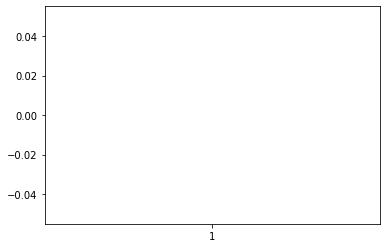

In [13]:
from matplotlib import pyplot as plt #มันมีค่า missing เลยplot ไม่ได้
plt.boxplot(data_cases['age'])

#Missing Values




*   NaN = Not a Number
*   Null
* NA = Not Available



In [14]:
data_cases.isnull()

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,False,False,True,False,False,False,False,False,False,False,True
1,False,False,True,False,False,False,False,False,False,False,True
2,False,False,True,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,True
4,False,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
543301,False,False,False,False,False,False,True,False,False,False,True
543302,False,False,False,False,False,False,True,False,False,False,True
543303,False,False,False,False,False,False,True,False,False,False,True
543304,False,False,False,False,False,False,True,False,False,False,True


In [15]:
data_cases.isnull().any() #สรุปข้อมูลเป็นรายคอลัม

No.                      True
announce_date            True
Notified date            True
sex                      True
age                      True
Unit                     True
nationality              True
province_of_isolation    True
risk                     True
province_of_onset        True
district_of_onset        True
dtype: bool

#Handlind Missing Value 1 (ลบค่า missing) 

{'boxes': [<matplotlib.lines.Line2D at 0x7fdc90c0bc10>],
 'caps': [<matplotlib.lines.Line2D at 0x7fdc90c12c90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fdc90c1bcd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fdc90c1b790>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fdc90c12210>,
  <matplotlib.lines.Line2D at 0x7fdc90c12750>]}

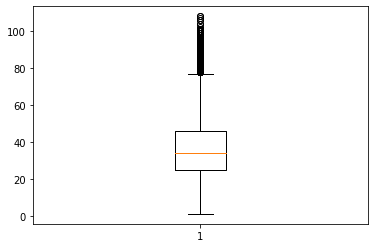

In [16]:
plt.boxplot(data_cases['age'].dropna())

In [17]:
data_cases.dropna()

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
47,48.0,6/3/2020,4/3/2020,ชาย,43.0,ปี,United Kingdom,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,คลองตัน
124,125.0,6/3/2021,5/3/2021,หญิง,55.0,ปี,Thailand,ปทุมธานี,Cluster ตลาดพรพัฒน์,ปทุมธานี,ธัญบุรี
161,162.0,17/3/2020,21/3/2020,ชาย,14.0,ปี,Thailand,สุราษฎร์ธานี,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,สุราษฎร์ธานี,เมือง
181,182.0,18/3/2020,15/3/2020,ชาย,33.0,ปี,Thailand,ขอนแก่น,สนามมวย,ขอนแก่น,เมือง
186,187.0,18/3/2020,16/3/2020,ชาย,36.0,ปี,Thailand,ร้อยเอ็ด,สนามมวย,ร้อยเอ็ด,เชียงขวัญ
...,...,...,...,...,...,...,...,...,...,...,...
543098,543099.0,28/7/2021,27/7/2021,หญิง,63.0,ปี,Thailand,กรุงเทพมหานคร,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,นครปฐม,พุทธมณฑล
543099,543100.0,28/7/2021,27/7/2021,ชาย,67.0,ปี,Thailand,กรุงเทพมหานคร,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,กรุงเทพมหานคร,หนองแขม
543100,543101.0,28/7/2021,27/7/2021,หญิง,68.0,ปี,Thailand,กรุงเทพมหานคร,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,กรุงเทพมหานคร,ดุสิต
543101,543102.0,28/7/2021,27/7/2021,ชาย,73.0,ปี,Thailand,กรุงเทพมหานคร,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,กรุงเทพมหานคร,ราษฎร์บูรณะ


In [18]:
data_cases.dropna().shape

(385643, 11)

In [19]:
data_cases.dropna().shape[0]

385643

###Quiz 3 หาว่า การทำ dropna() ทำให้ข้อมูลหายไปกี่ %




```
size before drop = 1000
size after drop = 10
we loss 99% of data
```







In [20]:
after = data_cases.shape[0] - data_cases.dropna().shape[0]
after

157663

In [21]:
data_af = (after/data_cases.shape[0])*100
data_af

29.019189922437818

เฉลย

In [27]:
removed = data_cases.shape[0] - data_cases.dropna().shape[0]

print(f'size before drop = {data_cases.shape[0]}')
print(f'size after drop = {data_cases.dropna().shape[0]}')
print(f'we lost {100*(removed/data_cases.shape[0])}% of data')

size before drop = 543306
size after drop = 385643
we lost 29.019189922437818% of data


## Handling Missing Value 1.5 (ลบค่า missing เฉพาะใน column ที่เราสนใจ)

In [28]:
data_cases_nomissingAge = data_cases.dropna(subset=['age'])

{'boxes': [<matplotlib.lines.Line2D at 0x7fdc908ac310>],
 'caps': [<matplotlib.lines.Line2D at 0x7fdc908b2cd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fdc908b9d10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fdc908b97d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fdc908b2250>,
  <matplotlib.lines.Line2D at 0x7fdc908b2790>]}

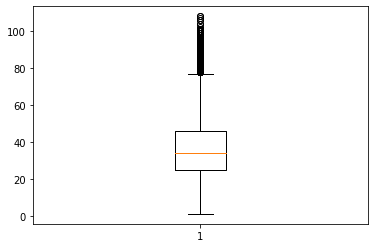

In [29]:
plt.boxplot(data_cases_nomissingAge['age'])

#Quiz3.1 หาว่าการทำ dropna() แบบเลือก drop เฉพาะ column ที่เราสนใจ (age) ทำให้ข้อมูลหายไปกี่ %

In [30]:
removed = data_cases.shape[0] - data_cases_nomissingAge.shape[0]

print(f'size before drop = {data_cases.shape[0]}')
print(f'size after drop = {data_cases_nomissingAge.shape[0]}')
print(f'we lost {100*(removed/data_cases.shape[0])}% of data')

size before drop = 543306
size after drop = 491048
we lost 9.618520686316735% of data


#Handling Misiing Value 2 (แทนค่าด้วย class ใหม่ (unknown))

In [31]:
data_cases

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,1.0,12/1/2020,NaN,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
1,2.0,17/1/2020,NaN,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
2,3.0,22/1/2020,NaN,หญิง,73.0,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง
3,4.0,22/1/2020,NaN,ชาย,68.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
4,5.0,24/1/2020,NaN,หญิง,66.0,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
...,...,...,...,...,...,...,...,...,...,...,...
543301,543302.0,28/7/2021,27/7/2021,ชาย,39.0,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543302,543303.0,28/7/2021,27/7/2021,ชาย,37.0,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543303,543304.0,28/7/2021,27/7/2021,ชาย,28.0,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543304,543305.0,28/7/2021,27/7/2021,ชาย,26.0,ปี,NaN,ปัตตานี,ทัณฑสถาน/เรือนจำ,ปัตตานี,NaN


In [32]:
data_cases[['risk']] = data_cases[['risk']].fillna('ไม่มีข้อมูล') #fillna เป็นการเติมค่า

In [33]:
set(data_cases['risk']) #set เหมือน set ทางคณิตศาสตร์

{'2.สัมผัสผู้ติดเชื้อ',
 'ACF รองเมือง',
 'ACF สนามกีฬาธูปะเตมีย์',
 'ACF สนามกีฬาไทย-ญี่ปุ่น',
 'ACF สีลม',
 'ACF เคหะหลักสี่',
 'Cluster Icon siam',
 "Cluster Memory 90's กรุงเทพมหานคร",
 'Cluster New Jazz กรุงเทพมหานคร',
 'Cluster The Lounge Salaya',
 'Cluster กรุงเทพมหานคร. คลองเตย',
 'Cluster คลองเตย',
 'Cluster งานมอเตอร์ โชว์',
 'Cluster จนท. สนามบินสุวรรณภูมิ',
 'Cluster จันทบุรี',
 'Cluster จันทบุรี (ชาวกินี )',
 'Cluster จันทบุรี (ชาวกินี)',
 'Cluster ชลบุรี',
 'Cluster ชลบุรี บริษัทไดกิ้น',
 'Cluster ชลบุรี โรงเบียร์ 90',
 'Cluster ตราด',
 'Cluster ตราด ',
 'Cluster ตลาดนนทบุรี',
 'Cluster ตลาดบางพลี',
 'Cluster ตลาดบางแค',
 'Cluster ตลาดบางแค/คลองขวาง',
 'Cluster ตลาดพรพัฒน์',
 'Cluster ตลาดสี่มุมเมือง',
 'Cluster ทัณฑสถานหญิงกลาง',
 'Cluster ทัณฑสถานโรงพยาบาลราชทัณฑ์',
 'Cluster ทันฑสถานบำบัดพิเศษกลาง',
 'Cluster บริษัทศรีสวัสดิ์',
 'Cluster บางแค',
 'Cluster บ่อนพัทยา/ชลบุรี',
 'Cluster บ่อนเทพารักษ์',
 'Cluster บ่อนไก่อ่างทอง',
 'Cluster ปากช่อง',
 'Cluster ผับ Thonglor'

#Handling Misiing Value 3 (แทนค่าด้วย class ใหม่ (ค่าที่เหมาะสม))

In [34]:
set(data_cases['Unit']) #คิดค่าที่เหมาะสมว่าอันไหนไม่กรอกให้แทนเป็นปี

{' วัน', ' เดือน', nan, 'ปี', 'วัน', 'เดือน'}

In [35]:
data_cases[['Unit']] = data_cases[['Unit']].fillna('ปี?') #เติมค่าลงไปเป็น ปี?

In [36]:
data_cases.isnull().any() #มาดูว่าเราจำกัดไปถึงไหนแล้ว

No.                       True
announce_date             True
Notified date             True
sex                       True
age                       True
Unit                     False
nationality               True
province_of_isolation     True
risk                     False
province_of_onset         True
district_of_onset         True
dtype: bool